In [36]:
import cv2

from PIL import Image
from PIL.ExifTags import TAGS

#import pillow_heif
#from pillow_heif import register_heif_opener
#register_heif_opener() # for using Image.open for .heic without changes

In [3]:
import os
from collections import Counter
from typing import Tuple, List, Optional

import pandas as pd
import numpy as np

from tqdm.auto import tqdm
tqdm.pandas()

In [4]:
#import seaborn as sns

In [5]:
#import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
#!pip list

In [8]:
DIR_DATA = os.path.join(os.getcwd(), 'data')
DIR_DATA_TRAIN = os.path.join(DIR_DATA, 'train')
DIR_DATA_TEST  = os.path.join(DIR_DATA, 'test')

In [35]:
def open_img(inp_path: str) -> np.ndarray:
    
    #if inp_path.endswith('.jpg'):
    ret_img = cv2.imread(inp_path)
    #else:
    #    if pillow_heif.is_supported(inp_path):
    #        heif_file = pillow_heif.open_heif(inp_path, convert_hdr_to_8bit=False)
            #print("image mode:", heif_file.mode)
            #print("image data length:", len(heif_file.data))
            #print("image data stride:", heif_file.stride)
    #        if heif_file.has_alpha:
    #            heif_file.convert_to("BGRA;16")
    #        else:
    #            heif_file.convert_to("BGR;16")  # convert 10 bit image to RGB 16 bit.
            #print("image mode:", heif_file.mode)
    #        ret_img = np.asarray(heif_file)
    
    return ret_img

In [10]:
def plot_corrc(inp_df: pd.DataFrame, inp_cols: List[str], targ_cols: Optional[List[int]] = ['distance']):
    f, ax = plt.subplots(1, 2, figsize=(24, 8))
    sns.heatmap(inp_df[inp_cols + targ_cols].corr(),
    #sns.heatmap(inp_df.query('c2 == 0')[inp_cols + targ_cols].corr(), \n",
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[0])
    sns.heatmap(inp_df[inp_cols + targ_cols].corr(method = 'spearman'),
    #sns.heatmap(inp_df.query('c2 == 1')[inp_cols + targ_cols].corr(), \n",
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1])
#    sns.heatmap(inp_df.query('c2 == 0')[inp_cols + targ_cols].corr(method = 'spearman'), \n",
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 0])\n",
#    sns.heatmap(inp_df.query('c2 == 1')[inp_cols + targ_cols].corr(method = 'spearman'), \n",
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 1])\n",
    if 'distrib_brdr' in inp_df.columns:
        sns.pairplot(inp_df[inp_cols + targ_cols + ['distrib_brdr']], height = 16,
                     hue = 'distrib_brdr', #palette = {\"A\": \"C0\", \"B\": \"C1\"}\n",
                     #markers = ['x', 'o']\n",
                    )
    else:
        sns.pairplot(inp_df[inp_cols + targ_cols], height = 16,
                    )

## Загрузка данных

In [11]:
train_list = os.listdir(DIR_DATA_TRAIN)
test_list  = os.listdir(DIR_DATA_TEST)

train_heic = [el for el in train_list if el.endswith('.heic')]
test_heic  = [el for el in test_list  if el.endswith('.heic')]

train_jpg = [el for el in train_list if el.endswith('.jpg')]
test_jpg  = [el for el in test_list if el.endswith('.jpg')]

fnames_train = set([el.split('.')[0] for el in train_list])
fnames_test  = set([el.split('.')[0] for el in test_list])

In [12]:
#print(Counter([el.split('.')[1] for el in train_list]))
#print(Counter([el.split('.')[1] for el in test_list]))

### Загружаем данные

(train_upd загружается только после выполнения 2step_make_features)

In [13]:
#train_df = pd.read_csv(os.path.join(DIR_DATA, 'train.csv'), delimiter = ';')
train_df = pd.read_csv(os.path.join(DIR_DATA, 'train_upd.csv'))
test_df  = pd.read_csv(os.path.join(DIR_DATA, 'test_upd.csv'))
train_df.shape, test_df.shape

((530, 24), (517, 22))

In [14]:
train_df.head()

,Unnamed: 0,image_name,distance,x_min,y_min,x_max,y_max,conf,class,h,...,log_y_max,log_h,log_w,tmp,plate_x_min,plate_y_min,plate_x_max,plate_y_max,plate_w,plate_h
0,0,img_1596.jpg,4.88,1661.429565,1172.557251,2280.754883,1717.927490,0.860230,2.0,545.370239,...,7.448874,6.301465,6.428631,"(399, 214, 449, 419)",399.0,214.0,449.0,419.0,50.0,205.0
1,1,img_1600.jpg,1.54,1125.149536,1184.862671,3012.469971,2716.756592,0.852567,2.0,1531.893921,...,7.907194,7.334260,7.542913,"(1307, 608, 1504, 1324)",1307.0,608.0,1504.0,1324.0,197.0,716.0
2,2,img_1601.jpg,3.68,1573.088257,1192.642944,2434.746826,2020.067017,0.645506,2.0,827.424072,...,7.610886,6.718317,6.758859,"(461, 292, 522, 578)",461.0,292.0,522.0,578.0,61.0,286.0
3,3,img_1603.jpg,2.22,2603.172363,1277.686401,3310.659912,1849.837769,0.782663,2.0,572.151367,...,7.522853,6.349404,6.561720,"(258, 160, 507, 415)",258.0,160.0,507.0,415.0,249.0,255.0
4,4,img_1605.jpg,3.73,1612.237183,1101.504517,2481.318848,1924.509155,0.764224,2.0,823.004639,...,7.562426,6.712962,6.767437,"(459, 289, 523, 575)",459.0,289.0,523.0,575.0,64.0,286.0


In [15]:
train_df.groupby('image_name').agg('size').value_counts()

1    530
dtype: int64

Посмотрим на размеры

Посмотрим на мин и макс

In [16]:
train_df.distance.nlargest(5)

91     9.38
260    9.06
80     8.80
90     8.78
368    8.74
Name: distance, dtype: float64

In [17]:
train_df.distance.nsmallest(5)

480    0.85
124    1.06
479    1.09
19     1.12
199    1.16
Name: distance, dtype: float64

In [18]:
print('min ', train_df.distance[train_df.distance.argmin()], '  ', train_df.image_name[train_df.distance.argmin()])
print('max ', train_df.distance[train_df.distance.argmax()], '  ', train_df.image_name[train_df.distance.argmax()])

min  0.85    img_2858.jpg
max  9.38    img_2724.heic


In [19]:
#img = open_img(os.path.join(DIR_DATA_TRAIN, train_df.image_name[train_df.distance.argmin()]))
img = open_img(os.path.join(DIR_DATA_TRAIN, train_df.image_name[train_df.distance.argmax()]))
#img = cv2.resize(img, [504*4, 504*3])
img = cv2.resize(img, [252*4, 252*3])
cv2.imshow('random', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

NameError: name 'pillow_heif' is not defined

In [20]:
train_df['ext'] = train_df.image_name.apply(lambda x: x.split('.')[1])

<AxesSubplot:>

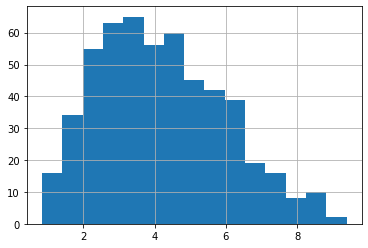

In [21]:
train_df.distance.hist(bins = 15)

In [22]:
# 520 x 112
# 245 x 160
# 290 х 170

Посмотрим пересечение датасетов

In [23]:
tmp = list(fnames_train.intersection(fnames_test))
len(tmp)

44

Смазанные фото

In [24]:
motion_blur_train = ['img_2709.heic', 'img_2733.heic', 'img_2734.heic']    # 'img_2734.heic' возможно рабочий 
motion_blur_test  = ['img_2674.heic']

In [25]:
img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2745.heic'))
#img = open_img(os.path.join(DIR_DATA_TEST, motion_blur_test[0]))
img = cv2.resize(img, [252*4, 252*3])
               
cv2.imshow('motion blur', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

NameError: name 'pillow_heif' is not defined

In [26]:
train_df.columns

Index(['Unnamed: 0', 'image_name', 'distance', 'x_min', 'y_min', 'x_max',
       'y_max', 'conf', 'class', 'h', 'w', 'log_x_min', 'log_y_min',
       'log_x_max', 'log_y_max', 'log_h', 'log_w', 'tmp', 'plate_x_min',
       'plate_y_min', 'plate_x_max', 'plate_y_max', 'plate_w', 'plate_h',
       'ext'],
      dtype='object')

In [27]:
#train_df['exp_w'] = train_df.w.apply(lambda x: np.exp(x))
train_df['log_w'] = train_df.w.apply(lambda x: np.log(x))

Посмотрим на корреляцию с признаками из train_upd

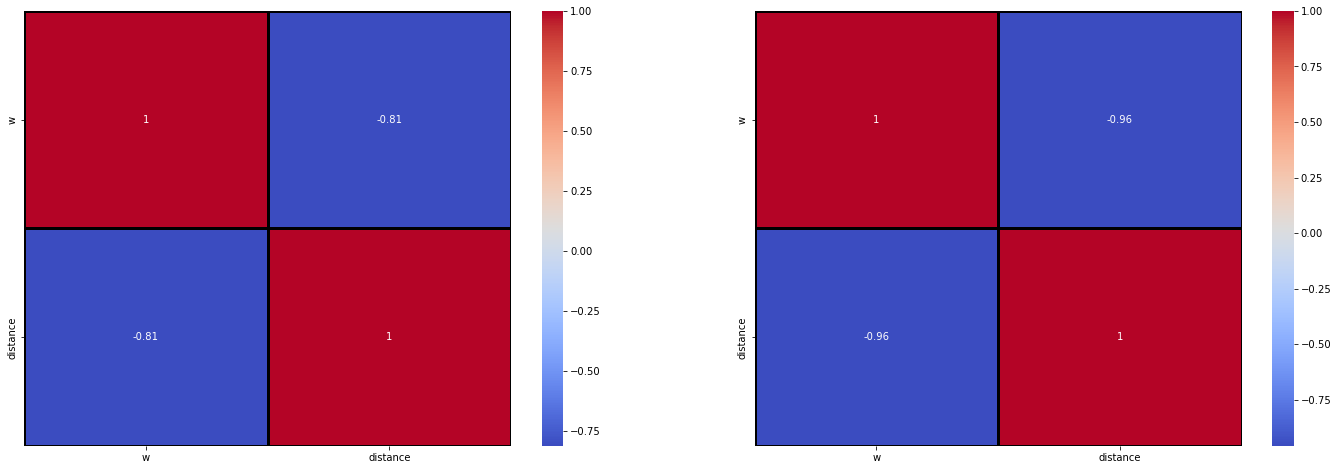

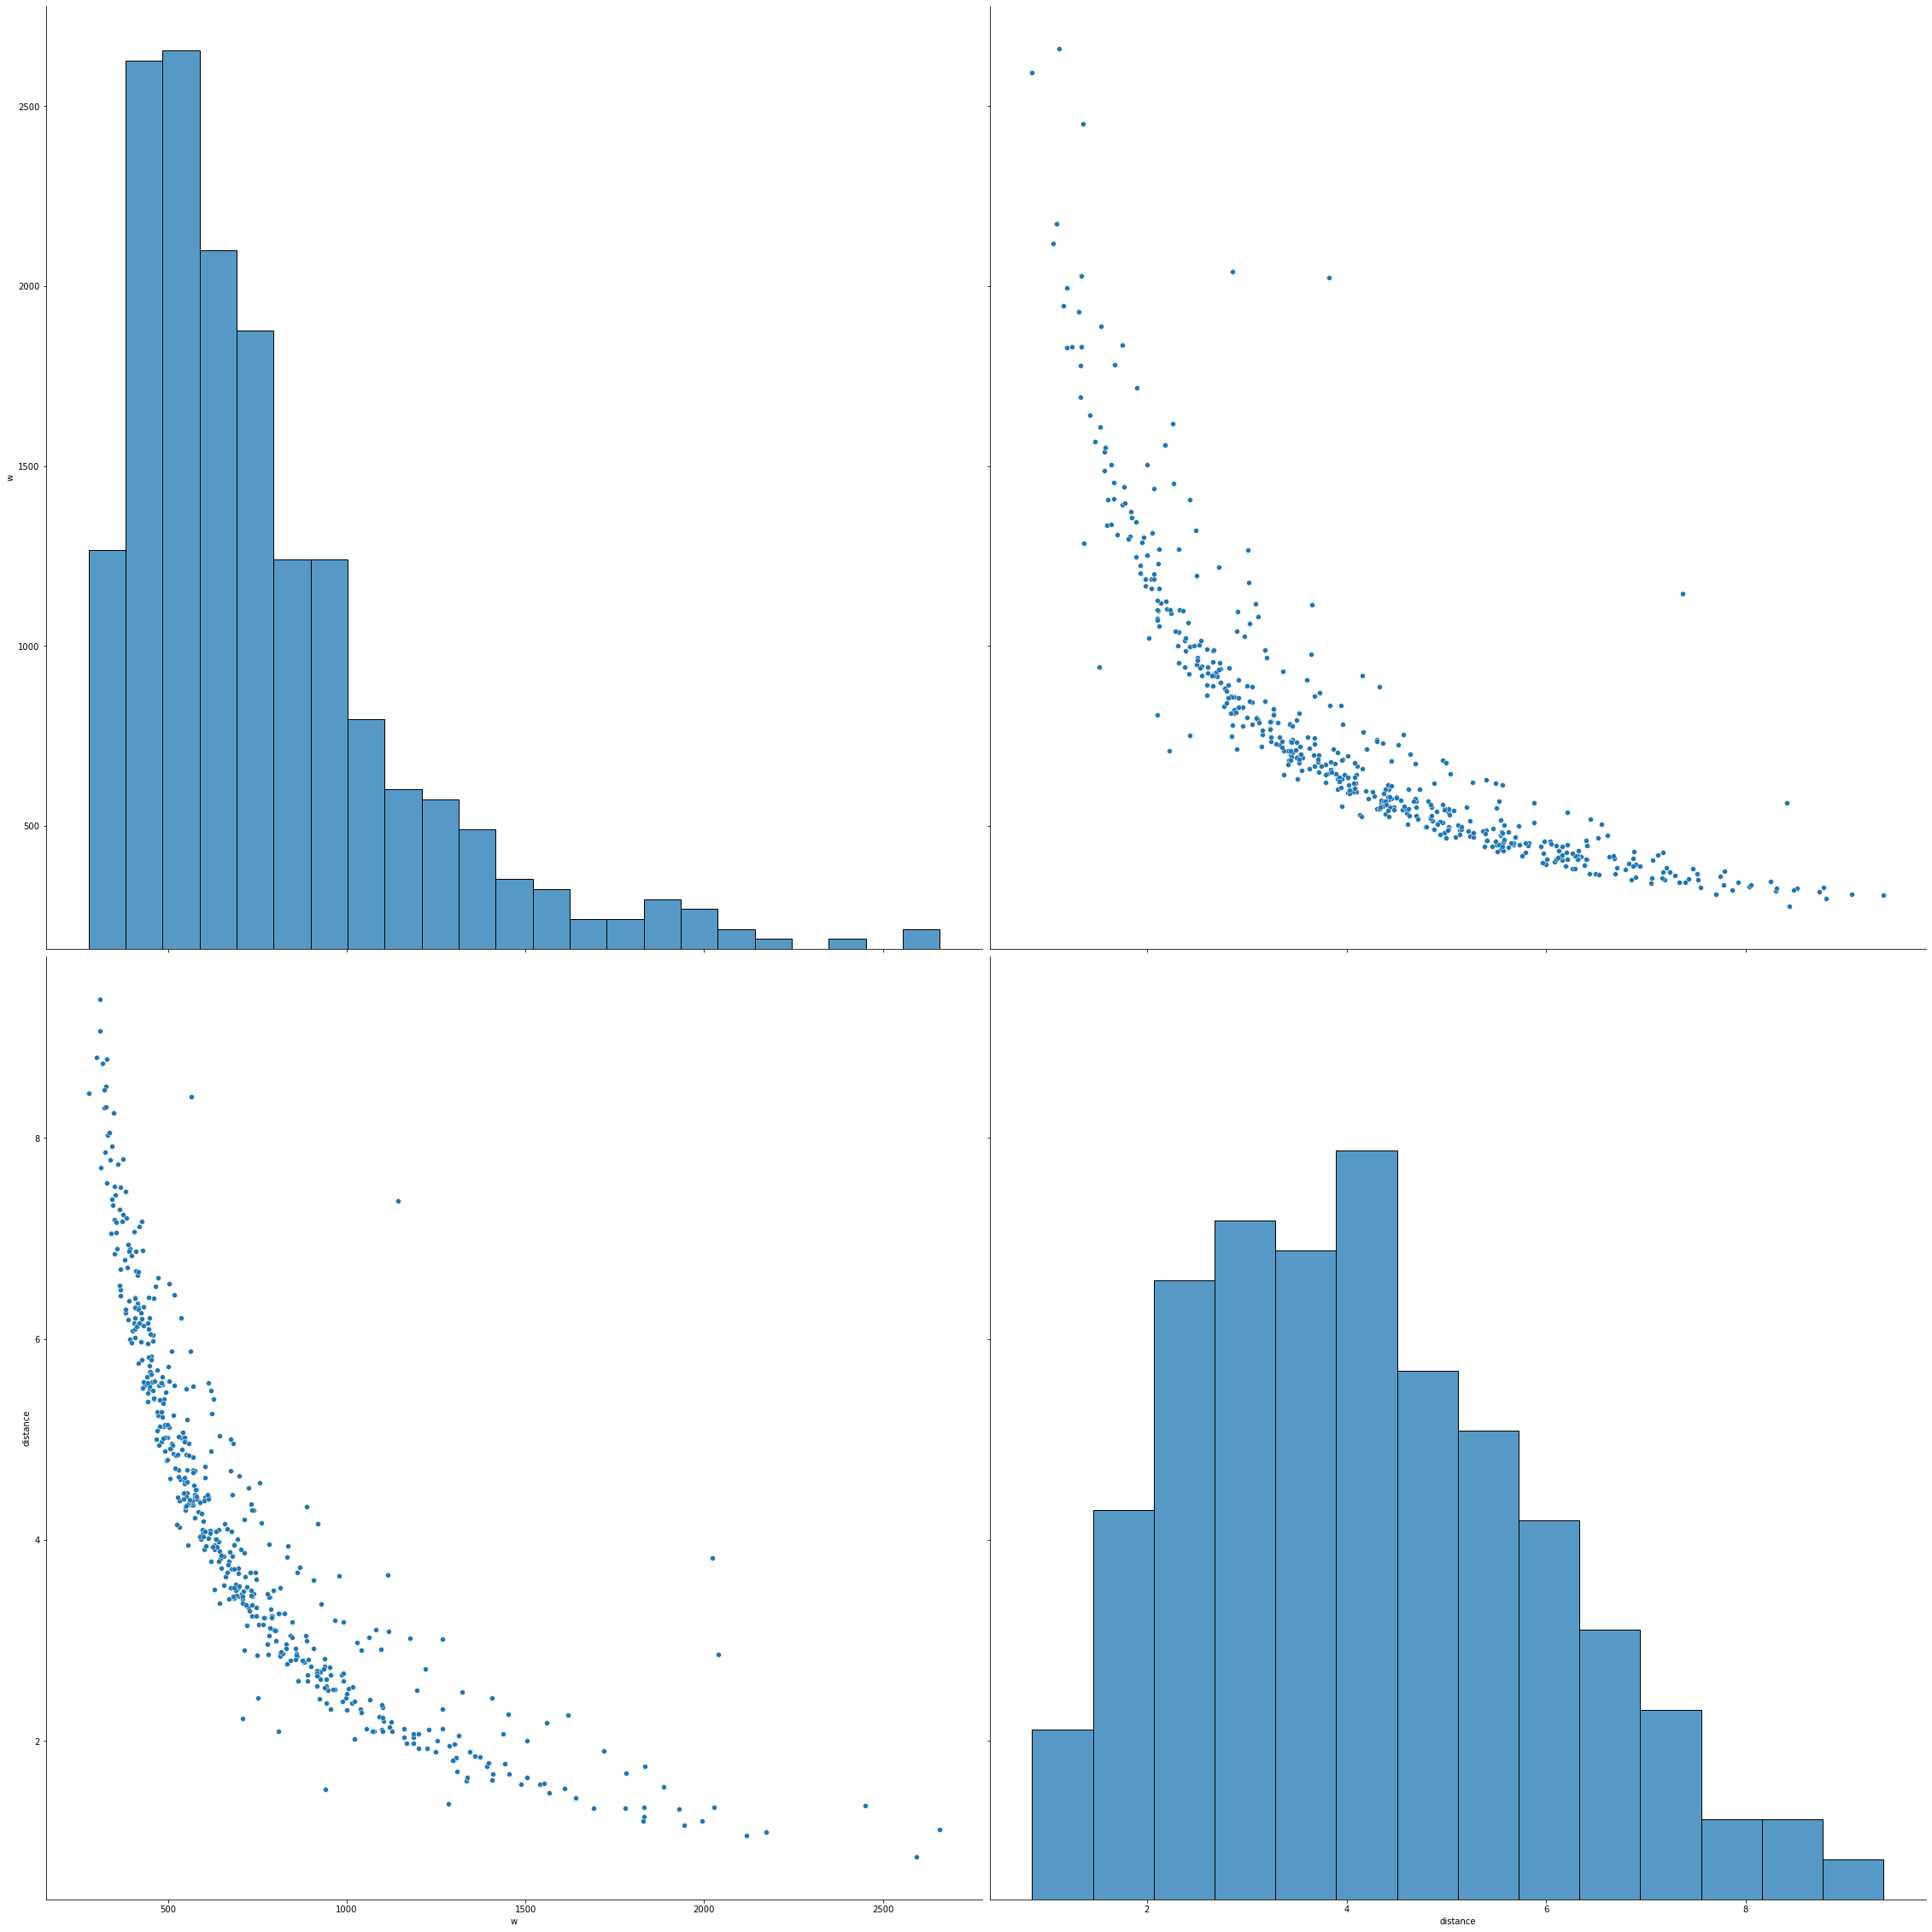

In [31]:
#plot_corrc(train_df, ['x_min', 'y_min', 'x_max', 'y_max', 'h', 'w']) #'conf', 
plot_corrc(train_df, ['w'])

In [29]:
train_df.sort_values('w').head(5)

,Unnamed: 0,image_name,distance,x_min,y_min,x_max,y_max,conf,class,h,...,log_h,log_w,tmp,plate_x_min,plate_y_min,plate_x_max,plate_y_max,plate_w,plate_h,ext
92,92,img_2726.heic,8.44,1835.837769,1418.255981,2112.787109,1653.007446,0.897338,2.0,234.751465,...,5.458527,5.623835,"(152, 95, 174, 183)",152.0,95.0,174.0,183.0,22.0,88.0,heic
80,80,img_2696.heic,8.80,1824.759521,1369.581787,2123.758057,1620.478638,0.884633,2.0,250.896851,...,5.525042,5.700439,"(169, 97, 192, 195)",169.0,97.0,192.0,195.0,23.0,98.0,heic
91,91,img_2724.heic,9.38,1784.518921,1340.706787,2092.518066,1598.900635,0.910434,2.0,258.193848,...,5.553711,5.730097,"(174, 105, 199, 205)",174.0,105.0,199.0,205.0,25.0,100.0,heic
260,260,img_2333.jpg,9.06,1701.218384,1323.682495,2010.513916,1619.299561,0.916093,2.0,295.617065,...,5.689065,5.734297,"(171, 33, 192, 128)",171.0,33.0,192.0,128.0,21.0,95.0,jpg
228,228,img_2277.jpg,7.70,1731.684326,1231.807251,2042.053955,1532.500488,0.920233,2.0,300.693237,...,5.706091,5.737764,"(206, 105, 235, 217)",206.0,105.0,235.0,217.0,29.0,112.0,jpg


In [30]:
test_df.sort_values('w').head(5)

,image_name,x_min,y_min,x_max,y_max,conf,class,h,w,log_x_min,...,log_y_max,log_h,log_w,tmp,plate_x_min,plate_y_min,plate_x_max,plate_y_max,plate_w,plate_h
20,img_1880.jpg,1752.908569,1384.831055,2008.372803,1612.750488,0.726267,2.0,227.919434,255.464233,7.469032,...,7.385696,5.428992,5.543082,"(126, 82, 147, 173)",126.0,82.0,147.0,173.0,21.0,91.0
423,img_1905.jpg,1982.508057,1276.362549,2253.098145,1504.149780,0.740427,2.0,227.787231,270.590088,7.592118,...,7.315983,5.428412,5.600605,"(131, 132, 147, 196)",131.0,132.0,147.0,196.0,16.0,64.0
179,img_1879.jpg,1713.232666,1377.652100,1987.999878,1620.031494,0.700419,2.0,242.379395,274.767212,7.446137,...,7.390201,5.490504,5.615924,"(130, 88, 153, 184)",130.0,88.0,153.0,184.0,23.0,96.0
44,img_2725.heic,1815.390503,1399.077637,2099.392578,1641.808838,0.886873,2.0,242.731201,284.002075,7.504056,...,7.403554,5.491955,5.648982,"(162, 97, 185, 190)",162.0,97.0,185.0,190.0,23.0,93.0
511,img_2693.jpg,1740.548218,1383.143921,2042.839355,1647.748657,0.832143,2.0,264.604736,302.291138,7.461955,...,7.407165,5.578237,5.711391,"(137, 96, 164, 204)",137.0,96.0,164.0,204.0,27.0,108.0


In [30]:
#el = 92 # 394, 313, 314
#name, x_min, y_min, x_max, y_max, dist = train_df.loc[el, ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'distance']].values

el = 122 # 143, 122, 32, 406
name, x_min, y_min, x_max, y_max = test_df.loc[el, ['image_name', 'x_min', 'y_min', 'x_max', 'y_max']].values

img = open_img(os.path.join(DIR_DATA_TEST, name))

cv2.rectangle(img, 
              (int(x_min), int(y_min)), 
              (int(x_max), int(y_max)),
              (255, 0, 0), 
              6,
              #cv2.FILLED
             )


img = cv2.resize(img, [252*4, 252*3])

cv2.imshow('bir error', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Проверим метеданные фотографий

In [31]:
# open the image
image = Image.open(os.path.join(DIR_DATA_TRAIN, train_jpg[0]))
  
# extracting the exif metadata
exifdata = image.getexif()
  
# looping through all the tags present in exifdata
for tagid in exifdata:
      
    # getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
  
    # passing the tagid to get its respective value
    value = exifdata.get(tagid)
    
    # printing the final result
    print(f"{tagname:25}: {value}")

GPSInfo                  : 2192
ResolutionUnit           : 2
ExifOffset               : 226
Make                     : Apple
Model                    : iPhone 11
Software                 : 15.5
Orientation              : 1
DateTime                 : 2022:07:07 11:47:31
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone 11


In [33]:
colors = {0: (0, 0, 255), 1: (255, 0, 0), 2: (0, 255, 0), }

In [37]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 2]  # person and car

_ = model.cpu()

Using cache found in C:\Users\_v010ch_/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-3 Python-3.9.12 torch-1.12.1 CUDA:0 (GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [38]:
# motion blur img_2733.heic, img_2734.heic
# nearest img_2858.jpg
# several cars img_2896.jpg, img_2885.jpg, !! img_2674.jpg, img_2660.jpg
# part closed img_2723.jpg
# left first img_2694.jpg
# car by side img_2418.jpg, 
# construction on the roof img_1832.jpg
# double car img_1621.jpg


# !!!TEST with strange number

# 'x_min', 'y_min', 'x_max', 'y_max', 'conf', 'class'

In [39]:
#img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2733.heic'))
img = open_img(os.path.join(DIR_DATA_TRAIN, 'img_2674.jpg'))
#results = model(np.array(img))
results = model(img)

In [40]:
colors[results.xyxy[0][0][-1].int().item()]

(0, 255, 0)

In [41]:
def get_car_center(inp_tensor: torch.Tensor) -> Tuple[int, int]:

    car_cntr = (int((inp_tensor[2].int().item() - inp_tensor[0].int().item())/2 + inp_tensor[0].int().item()),
                int((inp_tensor[3].int().item() - inp_tensor[1].int().item())/2 + inp_tensor[1].int().item())
        )
    
    return car_cntr

In [42]:
def get_center_dist(inp_center: Tuple[int, int], inp_point: Tuple[int, int]) -> float:
    
    return np.sqrt((inp_center[0] - inp_point[0])**2 + \
                   (inp_center[1] - inp_point[1])**2)

In [43]:
def determine_targ_car(inp_results, inp_img_cntr: Tuple[int, int]) -> int:
    
    min_dist = 1000000
    min_idx  = -1
    
    for el in range(inp_results.xyxy[0].shape[0]):
        # учитываем только машины
        if inp_results.xyxy[0][el][5].int().item() != 2:
            continue
            
        # минимальные габариты учитываемых машин
        # в противном случае иногда ближе к центру оказываются машины например 27х54
        h = inp_results.xyxy[0][el][3] - inp_results.xyxy[0][el][1]
        w = inp_results.xyxy[0][el][2] - inp_results.xyxy[0][el][0]
        if w < 200 or h < 200:
            continue
            
            
        car_cntr = get_car_center(inp_results.xyxy[0][el])
        cur_dist = get_center_dist(inp_img_cntr, car_cntr)
        if cur_dist < min_dist:
            min_dist = cur_dist
            min_idx = el

    return min_idx

In [44]:
def get_aspect_ratio(inp_points: np.ndarray) -> float:
    upper_len  = inp_points[1, 0, 0] - inp_points[0, 0, 0] 
    bottom_len = inp_points[2, 0, 0] - inp_points[3, 0, 0] 
    aver_len   = (upper_len + bottom_len)/2
    
    upper_hi  = inp_points[3, 0, 1] - inp_points[0, 0, 1] 
    bottom_hi = inp_points[2, 0, 1] - inp_points[1, 0, 1] 
    aver_hi   = (upper_hi + bottom_hi)/2
    
    return aver_hi / aver_len

In [45]:
#def get_label_plate_features(inp_img: np.ndarray, inp_coords: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
def get_label_plate_features(inp_img: np.ndarray, inp_coords: np.ndarray) -> List[float]:
    
    ret_lp_region   = np.zeros((4, 1, 2), dtype = np.int32)
    ret_legal_plate = np.zeros((4, 1, 2), dtype = np.int32)
    
    #x_min, y_min, x_max, y_max, conf, class, 
    #sub_img = inp_img[int(inp_coords.y_min) : int(inp_coords.y_max),
    #                  int(inp_coords.x_min) : int(inp_coords.x_max)
    #                 ]
    sub_img = inp_img[int(inp_coords[1]) : int(inp_coords[3]),
                      int(inp_coords[0]) : int(inp_coords[2])
                     ]
    
    # немного размываем что бы убрать лишние грани
    sub_img = cv2.bilateralFilter(sub_img, 11, 17, 17) 
    
    # детекрируем грани / контуры
    #edged = cv2.Canny(sub_img, 30, 200) 
    edged = cv2.Canny(sub_img, 15, 400) 
    cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # находим примерный контур номерного знака среди 10 самых больших контуров
    # 
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:10]   
    for idx, c in enumerate(cnts):
        # вычисляем периметр контура. True - контур замкнутый
        perimeter = cv2.arcLength(c, True)                     
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)  # 
        
        # предполагаем, что если контур из 4х точек, что это вероятно номер
        # так же учитываем соотношение сторон
        # ??? ограничить угол???
        if len(approx) == 4:  
            ar = get_aspect_ratio(approx) 
            #print(idx, ar)
            if ar < 0.85 and ar > 0.65:
                #print('region ', idx, ar)
                ret_lp_region = approx

            if ar < 0.25 and ar > 0.15:
                #print('legal plate ', idx, ar)
                ret_legal_plate = approx
                
    return (ret_legal_plate, ret_lp_region)
    
    # извлекаем признаки из координат
    #ret_legal_plate = get_lp_features_by_coord(ret_legal_plate)
    #ret_lp_region   = get_lp_features_by_coord(ret_lp_region)
    
    #return ret_legal_plate + ret_lp_region

In [46]:
img_cntr = (int(img.shape[1]/2), int(img.shape[0]/2))
target_goal = determine_targ_car(results, img_cntr)

In [47]:
cv2.circle(img, img_cntr, 10, (0, 0, 255), 20)
cv2.rectangle(img, 
              (results.xyxy[0][target_goal][0].int().item(), results.xyxy[0][target_goal][1].int().item()), 
             (results.xyxy[0][target_goal][2].int().item(), results.xyxy[0][target_goal][3].int().item()), 
             colors[results.xyxy[0][target_goal][-1].int().item()], 2)
#image = cv.circle(image, centerOfCircle, radius, color, thickness)
car_cntr = get_car_center(results.xyxy[0][target_goal])
_ = cv2.circle(img, car_cntr, 10, (255, 0, 0), 20)

In [48]:
img = cv2.resize(img, [252*4, 252*3])
               
cv2.imshow('motion blur', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [53]:
train_df[train_Df.image_name == 'image_2321.jpg']

NameError: name 'train_Df' is not defined

In [57]:
tt = ['img_1927.jpg', 'img_2321.jpg', 'img_2577.jpg','img_2578.jpg','img_2579.jpg','img_2583.jpg','img_2694.jpg',]
#for idx, el in enumerate(train_list[:10]):
#for idx, el in enumerate(train_list[100:120]):
for idx, el in enumerate(tt):
    #img = open_img(os.path.join(DIR_DATA_TRAIN, el))
    img = Image.open(os.path.join(DIR_DATA_TRAIN, el))
    img = np.array(img)
    
    results = model(img)
    
    if results.xyxy[0].shape != torch.Size([0, 6]):
        #print(results.xyxy[0].shape)
        for obj in range(results.xyxy[0].shape[0]):
            cv2.rectangle(img, 
                          (results.xyxy[0][obj][0].int().item(), results.xyxy[0][obj][1].int().item()), 
                          (results.xyxy[0][obj][2].int().item(), results.xyxy[0][obj][3].int().item()), 
                          colors[results.xyxy[0][obj][-1].int().item()], 
                          6,
                          #cv2.FILLED
                         )
            #_ = cv2.circle(img, car_cntr, 10, (255, 0, 0), 20)
            #print(obj)

        img_cntr = (int(img.shape[1]/2), int(img.shape[0]/2))
        target_goal = determine_targ_car(results, img_cntr)
        #print(target_goal)

        plate, reg = get_label_plate_features(img, results.xyxy[0][target_goal].numpy().tolist())
        sub_img = img[results.xyxy[0][target_goal][1].int().item() : results.xyxy[0][target_goal][3].int().item(), 
                  results.xyxy[0][target_goal][0].int().item() : results.xyxy[0][target_goal][2].int().item()
                 ]
        cv2.drawContours(sub_img, [plate], -1, (255, 0, 0), 6)        
        cv2.drawContours(sub_img, [reg], -1, (0, 0, 255), 6) 

        img[results.xyxy[0][target_goal][1].int().item() : results.xyxy[0][target_goal][3].int().item(), 
            results.xyxy[0][target_goal][0].int().item() : results.xyxy[0][target_goal][2].int().item()
          ] = sub_img
    
        
        
        
        
        sub_img = img[results.xyxy[0][target_goal][1].int().item() : results.xyxy[0][target_goal][3].int().item(), 
                      results.xyxy[0][target_goal][0].int().item() : results.xyxy[0][target_goal][2].int().item()
                     ]
        white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
        res = cv2.addWeighted(sub_img, 0.5, white_rect, 0.5, 1.0)
        
        img[results.xyxy[0][target_goal][1].int().item() : results.xyxy[0][target_goal][3].int().item(), 
            results.xyxy[0][target_goal][0].int().item() : results.xyxy[0][target_goal][2].int().item()
          ] = res
        
    
    
    cv2.circle(img, img_cntr, 10, (0, 0, 255), 20)
    
    img = cv2.resize(img, [252*4, 252*3])
    #img = cv2.resize(img, [504*4, 504*3])    
               
    cv2.imshow(f'{idx} {el}', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
    
    #break

C:\Users\_v010ch_\AppData\Local\Temp\ipykernel_9956\2132199754.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return aver_hi / aver_len
C:\Users\_v010ch_\AppData\Local\Temp\ipykernel_9956\2132199754.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return aver_hi / aver_len


In [89]:
plate

array([[[251, 289]],

       [[434, 293]],

       [[437, 338]],

       [[253, 333]]], dtype=int32)

In [50]:
print(results.xyxy[0][target_goal][1].int().item(), results.xyxy[0][target_goal][3].int().item(), )
print(results.xyxy[0][target_goal][0].int().item(), results.xyxy[0][target_goal][2].int().item())

1183 1761
1694 2283


In [51]:
sub_img = img[results.xyxy[0][target_goal][1].int().item() : results.xyxy[0][target_goal][3].int().item(), 
              results.xyxy[0][target_goal][0].int().item() : results.xyxy[0][target_goal][2].int().item()
             ]

sub_img = cv2.resize(sub_img, [252*4, 252*3])
#img = cv2.resize(img, [504*4, 504*3])    

cv2.imshow(f'tt', sub_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [47]:
sub_img

array([], shape=(0, 0, 3), dtype=uint8)

In [59]:
train_df = pd.read_csv(os.path.join(DIR_DATA, 'train_upd.csv'))

In [71]:
tmp99.image_name.values[0]

array(['img_1927.jpg'], dtype=object)

In [72]:
tt = ['img_1927.jpg', 'img_2321.jpg', 'img_2577.jpg','img_2578.jpg','img_2579.jpg','img_2583.jpg','img_2694.jpg',]
for el in tt:
    tmp99 = train_df[train_df.image_name == el]
    
    img = Image.open(os.path.join(DIR_DATA_TRAIN, tmp99.image_name.values[0]))
    img = np.array(img)
    
    sub_img = img[int(tmp99.y_min) : int(tmp99.y_max),
                  int(tmp99.x_min) : int(tmp99.x_max)
                 ]

    sub_img = cv2.resize(sub_img, [252*4, 252*3])
    #img = cv2.resize(img, [504*4, 504*3])    

    cv2.imshow(f'tt', sub_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
    
    

In [67]:
tmp99.y_min

165    1437.810425
Name: y_min, dtype: float64